# Singapore Airbnb Exploration
In this project, we are required to analysis data with CRISP-DM process. The CRISP-DM process is below

# Introduction
The data explored in this notebook was obtained from the [Airbnb Open Data site](http://insideairbnb.com/get-the-data.html). The data contains information about the availability of the listings, the characteristics of the listing and reviews provided by guests for 2019.

### Cross-Industry Standard Process for Data Mining (CRISP-DM) 
### Business Understanding
Understand the business drivers of the analysis to ensure value is provided in the correct focus areas. This involves understanding the business context and domain.
### Data Understanding
Collect data, describe data and explore data. Usually includes checking for data quality issues and getting clarity around what data is available and what is not available.
### Data Preparation
Select data, clean data, dervie/generate new data fields, and integrate data. The output will be data sets ready for use in analysis and modelling.
### Modeling
Select modelling technique (simple or complex), build model and assess model.
### Evaluation
Evaluate degree to which the model meets business aims and answers the business questions posed. Ideally, we want to draw conclusions related to the questions posed. Plan for potential future steps.
### Deployment
Determine a strategy for deployment. Goes into the realms of operationalising models for the business.

# Business Understanding
Airbnb is an online platform that connects travellers looking for accommodation to hosts of spaces available for rent.
In this exploration, we try find out the pattern of property through Airbnb and maximise the revenue returns from rental income. Here few question we are interested with:
### 1. When in the year 2019 give the higher revenues in Singapore with Airbnb?
### 2. Which locations give the higher revenue in Singapore with Airbnb?
### 3. What are the property characteristics give higher revenues in Singapore with Airbnb?

# Data Understanding
Here we got 3 dataset which is:<p><p>
listings: Descriptions and average review score <p>
calendar: Price and availability for particular day<p>
reviews: Unique ID for each reviewer and individual comments

In [0]:
import numpy as np
import pandas as pd 
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker

from sklearn import preprocessing
from time import time
from sklearn.metrics import accuracy_score, mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso
from sklearn.compose import TransformedTargetRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import fbeta_score, confusion_matrix, make_scorer, accuracy_score

In [0]:
# load from gdrive
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# load data
listing = pd.read_csv('/content/drive/My Drive/Colab Notebooks/p4/listings.csv')
calendar = pd.read_csv('/content/drive/My Drive/Colab Notebooks/p4/calendar.csv')
review = pd.read_csv('/content/drive/My Drive/Colab Notebooks/p4/reviews.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (42,43,61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
calendar.head(1)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,49091,2019-06-25,t,$81.00,$81.00,180,360


In [0]:
test = calendar[calendar['listing_id'] ==20791161]

In [0]:
test[test['available'] =='f']

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1188173,20791161,2019-06-26,f,"$10,000.00","$10,000.00",2,1125
1188263,20791161,2019-09-24,f,"$10,000.00","$10,000.00",2,1125
1188264,20791161,2019-09-25,f,"$10,000.00","$10,000.00",2,1125
1188265,20791161,2019-09-26,f,"$10,000.00","$10,000.00",2,1125
1188266,20791161,2019-09-27,f,"$11,000.00","$11,000.00",2,1125
1188267,20791161,2019-09-28,f,"$11,000.00","$11,000.00",2,1125
1188268,20791161,2019-09-29,f,"$10,000.00","$10,000.00",2,1125
1188269,20791161,2019-09-30,f,"$10,000.00","$10,000.00",2,1125
1188270,20791161,2019-10-01,f,"$10,000.00","$10,000.00",2,1125
1188271,20791161,2019-10-02,f,"$10,000.00","$10,000.00",2,1125


### listing dataset
First we look at data information in listing

In [0]:
listing.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20190625153033,2019-06-25,COZICOMFORT LONG TERM STAY ROOM 2,NaN,This is Room No. 2.(available after Jan 15 201...,This is Room No. 2.(available after Jan 15 201...,none,NaN,NaN,NaN,NaN,NaN,No smoking indoors. Please turn off lights/fan...,NaN,NaN,https://a0.muscache.com/im/pictures/24485541/6...,NaN,266763,https://www.airbnb.com/users/show/266763,Francesca,2010-10-20,singapore,I am a private tutor by profession. My husband...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/94361977-2...,https://a0.muscache.com/im/pictures/94361977-2...,Woodlands,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Singapore, Singapore",Woodlands,Woodlands,...,$14.00,180,360,180,180,360,360,180.0,360.0,61 months ago,t,30,60,90,365,2019-06-25,1,0,2013-10-21,2013-10-21,94.0,10.0,10.0,10.0,10.0,8.0,8.0,f,NaN,NaN,f,f,flexible,t,t,2,0,2,0,0.01
1,50646,https://www.airbnb.com/rooms/50646,20190625153033,2019-06-25,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,"Good Condition room, bright & windy. Comes wit...",Fully furnished bedroom with a nice view on th...,none,The serenity & quiet surrounding makes it an i...,Accommodation has a queen size bed. Suitable ...,Less than 400m from the apartment is the main ...,"Kitchen, washing facilities, gym, swimming poo...",We love to host people & have the opportunity ...,'- Should be family friendly. '- Cooking is no...,NaN,NaN,https://a0.muscache.com/im/pictures/36342984/6...,NaN,227796,https://www.airbnb.com/users/show/227796,Sujatha,2010-09-08,"Singapore, Singapore","I am a working professional, living in Singapo...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/8fd2cddb-2...,https://a0.muscache.com/im/pictures/8fd2cddb-2...,Bukit Timah,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Singapore, Singapore",Bukit Timah,Bukit Timah,...,$20.00,90,730,90,90,730,730,90.0,730.0,59 months ago,t,30,60,90,365,2019-06-25,18,0,2014-04-18,2014-12-26,91.0,9.0,10.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,f,t,1,0,1,0,0.28
2,56334,https://www.airbnb.com/rooms/56334,20190625153033,2019-06-25,COZICOMFORT,NaN,This is Room no. 1. USD700 per month On the fa...,This is Room no. 1. USD700 per month On the fa...,none,NaN,NaN,NaN,NaN,NaN,No smoking indoors. Please turn off lights/air...,NaN,NaN,https://a0.muscache.com/im/pictures/20783922/1...,NaN,266763,https://www.airbnb.com/users/show/266763,Francesca,2010-10-20,singapore,I am a private tutor by profession. My husband...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pi

In [0]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8293 entries, 0 to 8292
Columns: 106 entries, id to reviews_per_month
dtypes: float64(21), int64(22), object(63)
memory usage: 6.7+ MB


In [0]:
listing.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bath

In [0]:
listing.shape

(8293, 106)

In [0]:
listing['bedrooms'].unique()

array([ 1,  2,  3,  0,  4,  5,  6,  7,  8, 10, 50])

There are many columns, we just focus on some columns that what we interested to answer our questions above

In [0]:
# We just select the columns that we interested on
listing_sim = listing[['id', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'smart_location', 'property_type'
                    , 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'number_of_reviews']]
print(listing_sim.shape)                          

(8293, 13)


### calendar dataset
Second we look at data information in calendar

In [0]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,49091,2019-06-25,t,$81.00,$81.00,180,360
1,1804722,2019-06-25,t,$40.00,$40.00,180,720
2,1804722,2019-06-26,f,$40.00,$40.00,180,720
3,1804722,2019-06-27,t,$40.00,$40.00,180,720
4,1804722,2019-06-28,t,$40.00,$40.00,180,720


In [0]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3026945 entries, 0 to 3026944
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    int64
maximum_nights    int64
dtypes: int64(3), object(4)
memory usage: 161.7+ MB


The dataset contains 7 columns and almost 3M rows of data. <p>
- listing_id: need convert to `str` <p>
- date: need convert to `datetime` <p>
- available: need convert to dummy <p>
- price: drop $ and convert to float

# Data Preparation
## First dataset with date
Combine both listing and calender by using pd.merge() then drop listing_id column

In [0]:
# Combine the listing and calender
df = pd.merge(calendar, listing_sim, how='left', left_on='listing_id', right_on='id')
df.drop('listing_id', axis=1, inplace=True)

In [0]:
# drop adjusted_price since we got price 
df.drop('adjusted_price', axis=1, inplace=True)

In [0]:
# check proportion of missing value
df.isnull().sum()/len(df)*100

date                            0.000000
available                       0.000000
price                           0.000000
minimum_nights                  0.000000
maximum_nights                  0.000000
id                              0.000000
neighbourhood_cleansed          0.000000
neighbourhood_group_cleansed    0.000000
smart_location                  0.000000
property_type                   0.000000
room_type                       0.000000
accommodates                    0.000000
bathrooms                       0.072350
bedrooms                        0.000000
beds                            0.120584
bed_type                        0.000000
amenities                       0.000000
number_of_reviews               0.000000
dtype: float64

only bathrooms and beds exist of missing value where 7% and 12% repectively <p>
So we decided to remove rows

In [0]:
drop_rows = ['bathrooms', 'beds']
df = df.dropna(subset=drop_rows)

In [0]:
# Confirm data
df.isnull().sum()

date                            0
available                       0
price                           0
minimum_nights                  0
maximum_nights                  0
id                              0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
smart_location                  0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
number_of_reviews               0
dtype: int64

In [0]:
# Convert id type from int to str
df.loc[:, 'id'] = df['id'].astype(str)

In [0]:
# replace available't' and 'f' to boolean '1' and '0'
df.loc[:,'available'] = df['available'].replace({'t': 1, 'f': 0})

In [0]:
# replace available type to float
df.loc[:,'price'] = df['price'].str.strip('$').str.replace(",", "").astype(float)

In [0]:
# Convert date columns to datetime
df.loc[:, 'date'] = pd.to_datetime(df['date'])

In [0]:
# Add new columns: year, month, day, day of week
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['monthname'] = pd.DatetimeIndex(df['date']).month_name()
df['dayofmonth'] = pd.DatetimeIndex(df['date']).day
df['dayofweekname'] = pd.DatetimeIndex(df['date']).day_name()

In [0]:
# Extract amenities
df.amenities.value_counts()[:5]

{TV,Wifi,"Air conditioning",Pool,Kitchen,"Paid parking off premises","Smoking allowed","Pets allowed",Gym,Elevator,"Family/kid friendly",Washer,Dryer,Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Hot water","Luggage dropoff allowed","Long term stays allowed","Host greets you"}    21900
{TV,Wifi,"Air conditioning",Kitchen,Elevator,Washer,Dryer,"Smoke detector",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Hot water","Bed linens",Microwave,Refrigerator,"Dishes and silverware",Stove,"Long term stays allowed","Paid parking on premises"}       21900
{}                                                                                                                                                                                                                                                                                                                   17155
{TV,Wifi,"Air conditioning","Free parking on premises",

In [0]:
# Clean text with strip and replace
df.amenities = df.amenities.str.strip('{}').str.replace('"', '')
# Split then extract unique values
df_amenities = df.amenities.str.split(',', expand=True)
amenities = pd.unique(df_amenities.values.ravel('K'))

In [0]:
amenities

array(['TV', 'Kitchen', 'Wifi', 'Internet', 'Cable TV', 'Washer', '',
       'Air conditioning', 'translation missing: en.hosting_amenity_49',
       'Family/kid friendly', 'Essentials', 'Other',
       'Wheelchair accessible', 'Pool', 'Elevator', 'Pets allowed',
       'translation missing: en.hosting_amenity_50', 'Smoking allowed',
       'Free parking on premises', 'Iron', 'Suitable for events',
       'Breakfast', 'Lock on bedroom door', None, 'Fire extinguisher',
       'First aid kit', 'Smoke detector', 'Free street parking',
       'Paid parking off premises', 'Shampoo', 'Dryer', 'Hangers',
       'Self check-in', 'Pets live on this property',
       'Buzzer/wireless intercom', 'Doorman', 'Carbon monoxide detector',
       '24-hour check-in', 'Indoor fireplace', 'Safety card', 'Heating',
       'Host greets you', 'Gym', 'Hot tub', 'Hot water', 'Lockbox',
       'Dog(s)', 'Beachfront', 'Building staff',
       'Laptop friendly workspace', 'BBQ grill',
       'Long term stays allo

In [0]:
'''
for amenity in amenities:
    try:
        df[amenity] = df.amenities.str.contains(amenity)
    except:
        continue
'''

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# Drop original amenities
df.drop('amenities', axis=1, inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3021835 entries, 0 to 3026944
Data columns (total 22 columns):
date                            datetime64[ns]
available                       int64
price                           float64
minimum_nights                  int64
maximum_nights                  int64
id                              object
neighbourhood_cleansed          object
neighbourhood_group_cleansed    object
smart_location                  object
property_type                   object
room_type                       object
accommodates                    int64
bathrooms                       float64
bedrooms                        int64
beds                            float64
bed_type                        object
number_of_reviews               int64
year                            int64
month                           int64
monthname                       object
dayofmonth                      int64
dayofweekname                   object
dtypes: datetime64[ns](1), 

In [0]:
df.head()

,date,available,price,minimum_nights,maximum_nights,id,neighbourhood_cleansed,neighbourhood_group_cleansed,smart_location,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,number_of_reviews,year,month,monthname,dayofmonth,dayofweekname
0,2019-06-25,1,81.0,180,360,49091,Woodlands,North Region,Singapore,Apartment,Private room,1,1.0,1,1.0,Real Bed,1,2019,6,June,25,Tuesday
1,2019-06-25,1,40.0,180,720,1804722,Kallang,Central Region,Singapore,Apartment,Private room,2,1.0,1,1.0,Real Bed,1,2019,6,June,25,Tuesday
2,2019-06-26,0,40.0,180,720,1804722,Kallang,Central Region,Singapore,Apartment,Private room,2,1.0,1,1.0,Real Bed,1,2019,6,June,26,Wednesday
3,2019-06-27,1,40.0,180,720,1804722,Kallang,Central Region,Singapore,Apartment,Private room,2,1.0,1,1.0,Real Bed,1,2019,6,June,27,Thursday
4,2019-06-28,1,40.0,180,720,1804722,Kallang,Central Region,Singapore,Apartment,Private room,2,1.0,1,1.0,Real Bed,1,2019,6,June,28,Friday


In [0]:
df.shape

(3021835, 22)

In [0]:
# we only select available equal to 0 mean the listing is not available is renting out
df = df[df['available'] == 0]
df.head()

,date,available,price,minimum_nights,maximum_nights,id,neighbourhood_cleansed,neighbourhood_group_cleansed,smart_location,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,number_of_reviews,year,month,monthname,dayofmonth,dayofweekname
2,2019-06-26,0,40.0,180,720,1804722,Kallang,Central Region,Singapore,Apartment,Private room,2,1.0,1,1.0,Real Bed,1,2019,6,June,26,Wednesday
98,2019-06-25,0,206.0,1,1,756347,Pasir Ris,East Region,Singapore,Apartment,Private room,1,0.5,1,1.0,Real Bed,0,2019,6,June,25,Tuesday
99,2019-06-26,0,206.0,1,1,756347,Pasir Ris,East Region,Singapore,Apartment,Private room,1,0.5,1,1.0,Real Bed,0,2019,6,June,26,Wednesday
100,2019-06-27,0,206.0,1,1,756347,Pasir Ris,East Region,Singapore,Apartment,Private room,1,0.5,1,1.0,Real Bed,0,2019,6,June,27,Thursday
101,2019-06-28,0,206.0,1,1,756347,Pasir Ris,East Region,Singapore,Apartment,Private room,1,0.5,1,1.0,Real Bed,0,2019,6,June,28,Friday


In [0]:
df.shape

(1263772, 22)

In [0]:
# Save cleaned df
df.to_csv('/content/drive/My Drive/Colab Notebooks/p4/clean1.csv', index=False)

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/p4/clean1.csv')

In [0]:
df.shape

(1263772, 22)

In [0]:
df.head()

,date,available,price,minimum_nights,maximum_nights,id,neighbourhood_cleansed,neighbourhood_group_cleansed,smart_location,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,number_of_reviews,year,month,monthname,dayofmonth,dayofweekname
0,2019-06-26,0,40.0,180,720,1804722,Kallang,Central Region,Singapore,Apartment,Private room,2,1.0,1,1.0,Real Bed,1,2019,6,June,26,Wednesday
1,2019-06-25,0,206.0,1,1,756347,Pasir Ris,East Region,Singapore,Apartment,Private room,1,0.5,1,1.0,Real Bed,0,2019,6,June,25,Tuesday
2,2019-06-26,0,206.0,1,1,756347,Pasir Ris,East Region,Singapore,Apartment,Private room,1,0.5,1,1.0,Real Bed,0,2019,6,June,26,Wednesday
3,2019-06-27,0,206.0,1,1,756347,Pasir Ris,East Region,Singapore,Apartment,Private room,1,0.5,1,1.0,Real Bed,0,2019,6,June,27,Thursday
4,2019-06-28,0,206.0,1,1,756347,Pasir Ris,East Region,Singapore,Apartment,Private room,1,0.5,1,1.0,Real Bed,0,2019,6,June,28,Friday


In [0]:
df1 = df.groupby('date')['price'].mean().reset_index()

In [0]:
df1.shape

(365, 2)

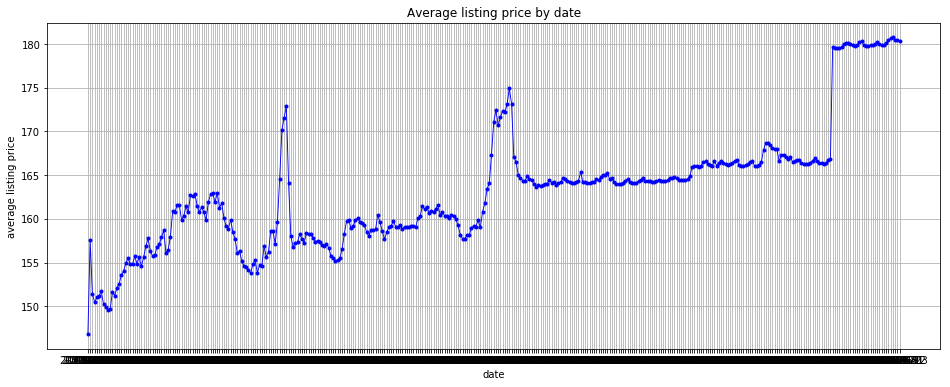

In [0]:
# plot avg listings prices over time.
plt.figure(figsize=(16, 6))
plt.plot(df1.date, df1.price, color='b', marker='.', linewidth=0.9)
plt.title("Average listing price by date")
plt.xlabel('date')
plt.ylabel('average listing price')
plt.grid()

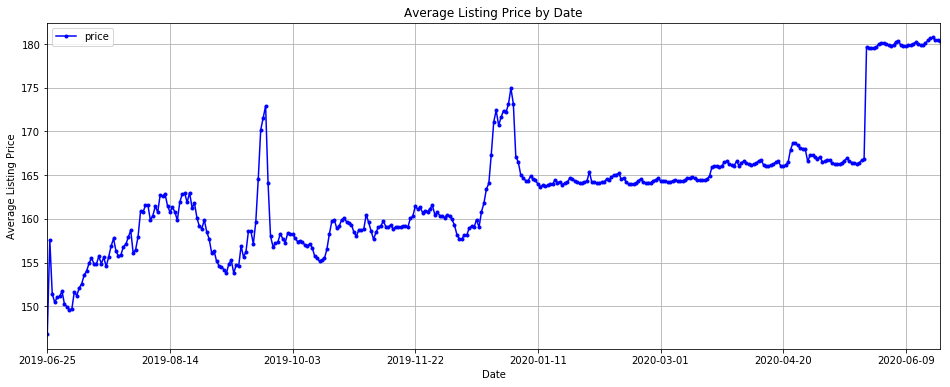

In [0]:
# better plot avg listings prices over time.
ax = df1.plot(x='date', y='price', color='b', marker='.', figsize = (16,6), grid = True)
ax.set_title("Average Listing Price by Date")
ax.set_xlabel('Date')
ax.set_ylabel('Average Listing Price');

In [0]:
df2 = pd.DataFrame( df.groupby(['date','available','year','month','monthname','dayofmonth','dayofweekname'])['price'].agg(['sum', 'count']))

In [0]:
df2.reset_index(inplace=True)
df2.columns = ['date','available','year','month','monthname','dayofmonth','dayofweekname', 'total_revenue_per_date', 'total_properties_rented_per_date']

In [0]:
df2.tail()

,date,available,year,month,monthname,dayofmonth,dayofweekname,total_revenue_per_date,total_properties_rented_per_date
360,2020-06-19,0,2020,6,June,19,Friday,638435.0,3534
361,2020-06-20,0,2020,6,June,20,Saturday,638255.0,3531
362,2020-06-21,0,2020,6,June,21,Sunday,637327.0,3532
363,2020-06-22,0,2020,6,June,22,Monday,637280.0,3531
364,2020-06-23,0,2020,6,June,23,Tuesday,635590.0,3525


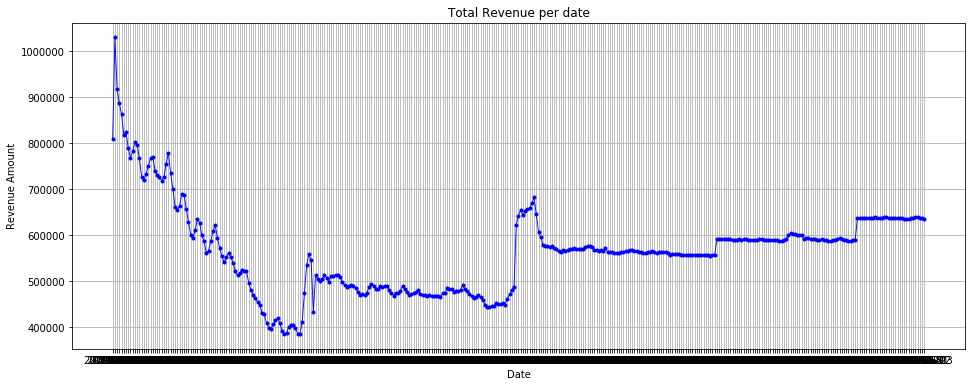

In [0]:
# plot Total Revenue over time.
plt.figure(figsize=(16, 6))
plt.plot(df2.date, df2.total_revenue_per_date, color='b', marker='.', linewidth=0.9)
plt.title("Total Revenue per date")
plt.xlabel('Date')
plt.ylabel('Revenue Amount')
plt.grid()

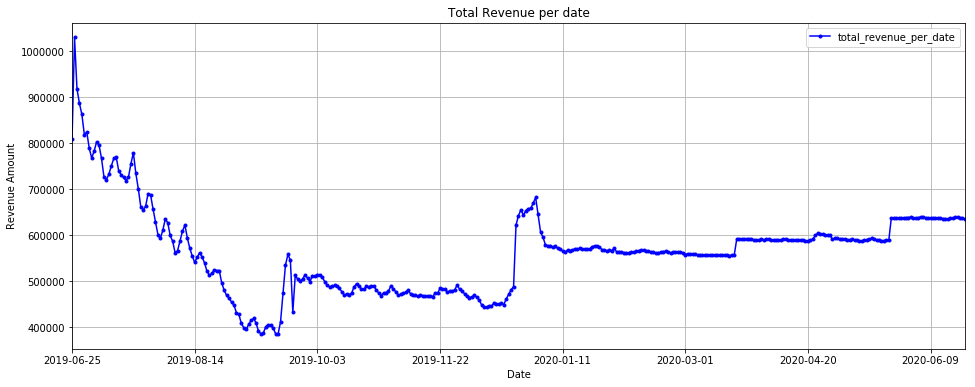

In [0]:
# better plot Total Revenue over time.
ax = df2.plot(x='date', y='total_revenue_per_date', color='b', marker='.', figsize = (16,6), grid = True)
ax.set_title("Total Revenue per date")
ax.set_xlabel('Date')
ax.set_ylabel('Revenue Amount');

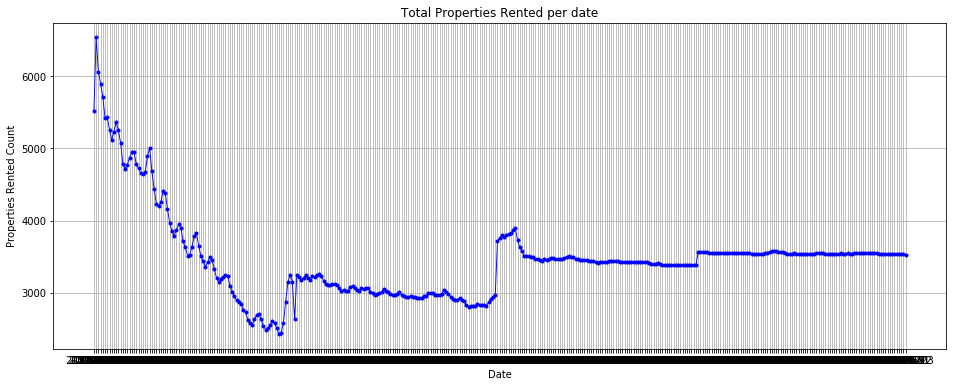

In [0]:
# plot Total Properties Rented over time.
plt.figure(figsize=(16, 6))
plt.plot(df2.date, df2.total_properties_rented_per_date, color='b', marker='.', linewidth=0.9)
plt.title("Total Properties Rented per date")
plt.xlabel('Date')
plt.ylabel('Properties Rented Count')
plt.grid()

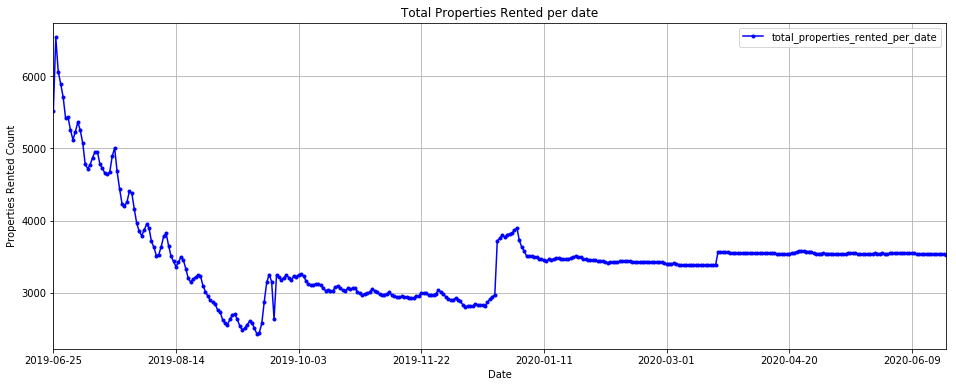

In [0]:
# better plot Total Properties Rented over time.
ax = df2.plot(x='date', y='total_properties_rented_per_date', color='b', marker='.', figsize = (16,6), grid = True)
ax.set_title("Total Properties Rented per date")
ax.set_xlabel('Date')
ax.set_ylabel('Properties Rented Count');

## Second dataset without date

In [0]:
listing_1 = listing[['id', 'price', 'neighbourhood_cleansed', 'property_type'
                    , 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'number_of_reviews']]
# Convert id type from int to str
listing_1.loc[:, 'id'] = listing_1['id'].astype(str)
# replace available type to float
listing_1.loc[:,'price'] = listing_1['price'].str.strip('$').str.replace(",", "").astype(float)

In [0]:
# we use groupby to group according the id and count the days for each id
days_rent = pd.DataFrame(df.groupby(['id'])['date'].count().sort_values(ascending=False))
# reset the index because we do not want the id become the index by default
days_rent.reset_index(level=0, inplace=True)

In [0]:
# rename the column
days_rent.columns = ['id','days_rent']

In [0]:
# Convert id type from int to str
days_rent.loc[:, 'id'] = days_rent['id'].astype(str)
days_rent.head()

,id,days_rent
0,10075591,365
1,21256274,365
2,21402350,365
3,21400246,365
4,21370642,365


In [0]:
days_rent.describe()

,days_rent
count,7467.000000
mean,169.247623
std,139.655699
min,1.000000
25%,34.000000
50%,157.000000
75%,312.000000
max,365.000000


In [0]:
#Total number of unique listing
days_rent.id.value_counts().sum()

7467

In [0]:
days_rent1 = pd.merge(listing_1, days_rent, how='left', on=['id'])

In [0]:
days_rent1.head()

,id,price,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,number_of_reviews,days_rent
0,49091,81.0,Woodlands,Apartment,Private room,1,1.0,1,1.0,Real Bed,1,NaN
1,50646,80.0,Bukit Timah,Apartment,Private room,2,1.0,1,1.0,Real Bed,18,NaN
2,56334,68.0,Woodlands,Apartment,Private room,1,1.0,1,1.0,Real Bed,20,NaN
3,71609,200.0,Tampines,Villa,Private room,6,1.0,2,3.0,Real Bed,12,12.0
4,71896,92.0,Tampines,House,Private room,3,0.5,1,1.0,Real Bed,20,12.0


In [0]:
days_rent1.isnull().sum()

id                          0
price                       0
neighbourhood_cleansed      0
property_type               0
room_type                   0
accommodates                0
bathrooms                   6
bedrooms                    0
beds                       10
bed_type                    0
number_of_reviews           0
days_rent                 826
dtype: int64

In [0]:
# Replace all null 'days_rented' with 0
days_rent1[['bathrooms','beds','days_rent']] = days_rent1[['bathrooms','beds','days_rent']].fillna(0)

In [0]:
days_rent1.isnull().sum()

id                        0
price                     0
neighbourhood_cleansed    0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
bed_type                  0
number_of_reviews         0
days_rent                 0
dtype: int64

In [0]:
# Create a new 'revenue' column (price * days_rent)
days_rent1['revenue'] = days_rent1['price'] * days_rent1['days_rent']
days_rent1.head()

,id,price,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,number_of_reviews,days_rent,revenue
0,49091,81.0,Woodlands,Apartment,Private room,1,1.0,1,1.0,Real Bed,1,0.0,0.0
1,50646,80.0,Bukit Timah,Apartment,Private room,2,1.0,1,1.0,Real Bed,18,0.0,0.0
2,56334,68.0,Woodlands,Apartment,Private room,1,1.0,1,1.0,Real Bed,20,0.0,0.0
3,71609,200.0,Tampines,Villa,Private room,6,1.0,2,3.0,Real Bed,12,12.0,2400.0
4,71896,92.0,Tampines,House,Private room,3,0.5,1,1.0,Real Bed,20,12.0,1104.0


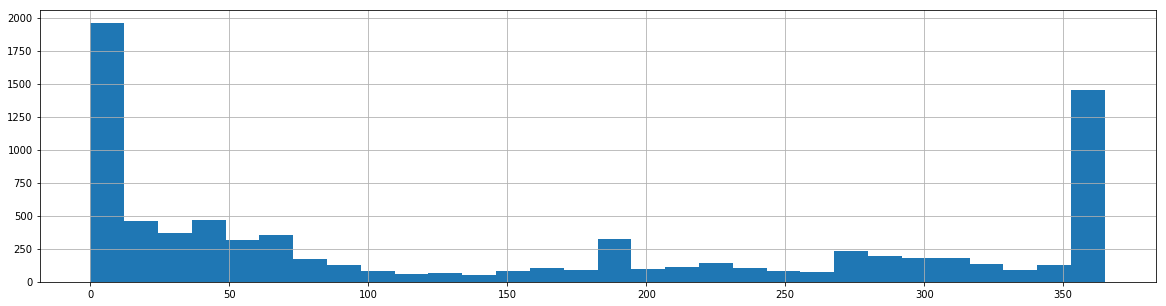

In [0]:
# Histogram plot for number of days renting out
days_rent1['days_rent'].hist(bins = 30,figsize=(20,5));                                    

In [0]:
# Save cleaned df
days_rent1.to_csv('/content/drive/My Drive/Colab Notebooks/p4/days_rent1.csv', index=False)

## Question 1: When in the year 2019 give the higher revenues in Singapore with Airbnb?



## Modeling
We using the dataset with date which we saved earlier. <p>
The dataset is consisting month and day of week. <p>
We calculate the total revenue and total properties rented. <p>
The total revenue and total properties rented with two different level of date will be plot in bar chart.

In [0]:
df3 = pd.DataFrame(df.groupby(['month','monthname'])['price'].agg(['sum', 'count'])).reset_index()
df3.columns = ['month','monthname','total_revenue', 'total_property_rented']

In [0]:
df3['average_revenue_per_property'] = df3['total_revenue']/df3['total_property_rented']
df3

,month,monthname,total_revenue,total_property_rented,average_revenue_per_property
0,1,January,17825212.0,108208,164.731000
1,2,February,16345931.0,99421,164.411251
2,3,March,17606000.0,106685,165.027886
3,4,April,17770515.0,106551,166.779430
4,5,May,18667843.0,109783,170.043112
5,6,June,19986203.0,116536,171.502394
6,7,July,22442740.0,145474,154.273203
7,8,August,16830366.0,104654,160.819137
8,9,September,13313352.0,83938,158.609355
9,10,October,15112761.0,95711,157.899938


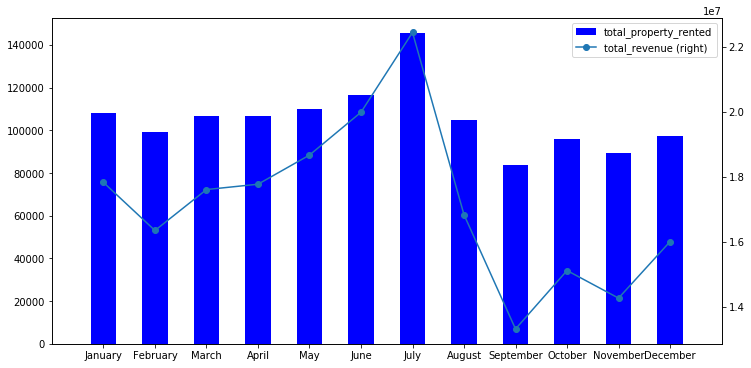

In [0]:
plt.figure(figsize=(12, 6))
ax1 = df3['total_property_rented'].plot(kind='bar', width = 0.5, color='Blue', legend=True)
ax1 = df3['total_revenue'].plot(kind='line', marker='o', secondary_y=True, legend=True)
ax1.set_xticks(np.arange(len(df3['monthname'])))
ax1.set_xticklabels(df3['monthname'])
plt.xlim(-1,12)
plt.show();

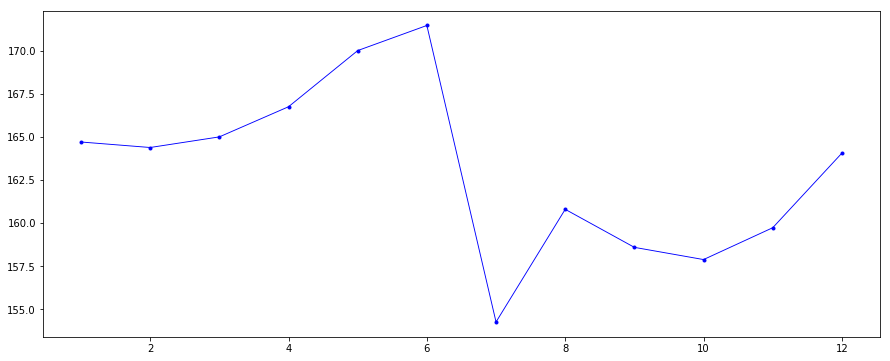

In [0]:
plt.figure(figsize=(15, 6))
plt.plot(df3.month, df3.average_revenue_per_property, color='b', marker='.', linewidth=0.9);

In [0]:
df4 = pd.DataFrame(df.groupby(['dayofweekname'])['price'].agg(['sum', 'count'])).reset_index()
df4.columns = ['dayofweekname','total_revenue', 'total_property_rented']
df4

,dayofweekname,total_revenue,total_property_rented
0,Friday,29637871.0,181836
1,Monday,29059753.0,177730
2,Saturday,29647530.0,181543
3,Sunday,29332573.0,179293
4,Thursday,29382468.0,180480
5,Tuesday,29778843.0,182831
6,Wednesday,29327588.0,180059


In [0]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday = pd.DataFrame(df.groupby(['dayofweekname'])['price'].agg(['sum', 'count'])).reindex(cats) 
df_weekday.columns = ['total_revenue', 'total_property_rented']
df_weekday.reset_index(level=0, inplace=True)
df_weekday['average_revenue_per_property'] = df_weekday['total_revenue']/df_weekday['total_property_rented']
df_weekday

,dayofweekname,total_revenue,total_property_rented,average_revenue_per_property
0,Monday,29059753.0,177730,163.505053
1,Tuesday,29778843.0,182831,162.876334
2,Wednesday,29327588.0,180059,162.877657
3,Thursday,29382468.0,180480,162.801795
4,Friday,29637871.0,181836,162.992317
5,Saturday,29647530.0,181543,163.308583
6,Sunday,29332573.0,179293,163.601329


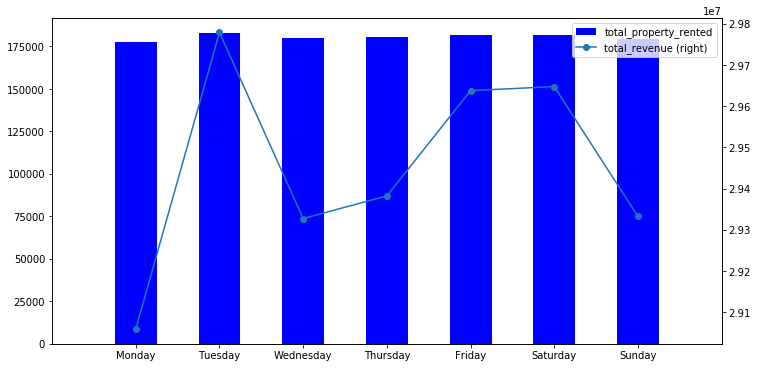

In [0]:
plt.figure(figsize=(12, 6))
ax1 = df_weekday['total_property_rented'].plot(kind='bar', width = 0.5, color='Blue', legend=True)
ax1 = df_weekday['total_revenue'].plot(kind='line', marker='o', secondary_y=True, legend=True)
ax1.set_xticks(np.arange(len(df_weekday['dayofweekname'])))
ax1.set_xticklabels(df_weekday['dayofweekname'])
plt.xlim(-1,7)
plt.show();

In [0]:
plt.figure(figsize=(15, 6))
plt.plot(df_weekday.month, df_weekday.average_revenue_per_property, color='b', marker='.', linewidth=0.9);

## Evaluation
Month as criteria: 
- The first 7 months in the year can see uptrend of total revenue.
- Highest total revenue is July.
- Hence, property owners can focus more on they property listing in first 7 months of the year. 

Day as criteria:
- Tuesday give the highest total revenue, then followed by Friday and Saturday.
- Property owners can focus more on they property listing on Tuesday, Friday and Saturday.

## Question 2: Which locations give the higher revenue in Singapore with Airbnb?

## Modeling
We using dataset without date. <p>
Then we select some features in the dataset we want to focused which is neighbourhood_cleansed, and revenue. <p>
We calculate the total_earning, number_of_listing, average_earning_per_listing <p>
The top 5 highest revenue listing location will be presented in table

In [0]:
days_rent1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/p4/days_rent1.csv')

In [0]:
df10 = days_rent1.groupby(['neighbourhood_cleansed'])['revenue'].agg(['sum', 'count', 'mean']).reset_index()
df10.columns = ['neighbourhood_cleansed','total_earning','number_of_listing','average_earning_per_listing']

In [0]:
df11 = df10.sort_values(by='average_earning_per_listing', ascending=False)
df11['total_earning'] = df11['total_earning'].astype(int)
df11['average_earning_per_listing'] = df11['average_earning_per_listing'].astype(int)
df11.head()

,neighbourhood_cleansed,total_earning,number_of_listing,average_earning_per_listing
41,Tuas,2750000,1,2750000
36,Southern Islands,6262312,18,347906
6,Bukit Panjang,4269191,36,118588
14,Jurong East,4938363,114,43318
19,Marina South,40320,1,40320


## Evaluation
- Tuas give the highest average revenue which is $ 2,750,000 but only 1 rented out listing in Tuas.
- Then followed by Southern Islands, Bukit Panjang, Jurong East, and Marina South with 347,906; 118,588; 43,318; 40,320 respectively.
- Jurong East recorded highest number of listing which mean existing of greater competition, resulting in more competitive pricing.
- Checking out the Tuas listing actaully is luxury penthouse.(https://www.airbnb.com/rooms/20791161)

## Question 3: What property characteristics that give the higher revenues?

## Modeling
We using dataset without date <p>
Then we select features in the dataset we want to analyze and store in new dataframe. <p>
We encode the categorical features, and standardize the data values.<p>
Then we split the data into train and test set.<p>
Instantiate the prediction model and measuring the error with model scoring. <p>
We using LinearRegression, DecisionTreeRegressor, Lasso, RidgeCV, RandomForestClassifier for the prediction.

In [0]:
days_rent1.head()

,id,price,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,number_of_reviews,days_rent,revenue
0,49091,81.0,Woodlands,Apartment,Private room,1,1.0,1,1.0,Real Bed,1,0.0,0.0
1,50646,80.0,Bukit Timah,Apartment,Private room,2,1.0,1,1.0,Real Bed,18,0.0,0.0
2,56334,68.0,Woodlands,Apartment,Private room,1,1.0,1,1.0,Real Bed,20,0.0,0.0
3,71609,200.0,Tampines,Villa,Private room,6,1.0,2,3.0,Real Bed,12,12.0,2400.0
4,71896,92.0,Tampines,House,Private room,3,0.5,1,1.0,Real Bed,20,12.0,1104.0


In [0]:
days_rent1.columns

Index(['id', 'price', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'number_of_reviews', 'days_rent', 'revenue'],
      dtype='object')

In [0]:
# Select the relevant columns
df_rel = days_rent1[['price','neighbourhood_cleansed','property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type','revenue']]
                                                               

In [0]:
# Check the data type of each field
df_rel.dtypes

price                     float64
neighbourhood_cleansed     object
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                    int64
beds                      float64
bed_type                   object
days_rent                 float64
dtype: object

In [0]:
# object type need to be encoded
encode = ['neighbourhood_cleansed','property_type', 'room_type', 'bed_type']

In [0]:
# one hot encoding
df_rel = pd.get_dummies(data = df_rel, columns = encode, drop_first=False)
df_rel.head()

,price,accommodates,bathrooms,bedrooms,beds,revenue,neighbourhood_cleansed_Ang Mo Kio,neighbourhood_cleansed_Bedok,neighbourhood_cleansed_Bishan,neighbourhood_cleansed_Boon Lay,neighbourhood_cleansed_Bukit Batok,neighbourhood_cleansed_Bukit Merah,neighbourhood_cleansed_Bukit Panjang,neighbourhood_cleansed_Bukit Timah,neighbourhood_cleansed_Central Water Catchment,neighbourhood_cleansed_Choa Chu Kang,neighbourhood_cleansed_Clementi,neighbourhood_cleansed_Downtown Core,neighbourhood_cleansed_Geylang,neighbourhood_cleansed_Hougang,neighbourhood_cleansed_Jurong East,neighbourhood_cleansed_Jurong West,neighbourhood_cleansed_Kallang,neighbourhood_cleansed_Lim Chu Kang,neighbourhood_cleansed_Mandai,neighbourhood_cleansed_Marina South,neighbourhood_cleansed_Marine Parade,neighbourhood_cleansed_Museum,neighbourhood_cleansed_Newton,neighbourhood_cleansed_Novena,neighbourhood_cleansed_Orchard,neighbourhood_cleansed_Outram,neighbourhood_cleansed_Pasir Ris,neighbourhood_cleansed_Paya Lebar,neighbourhood_cleansed_Punggol,neighbourhood_cleansed_Queenstown,neighbourhood_cleansed_River Valley,neighbourhood_cleansed_Rochor,neighbourhood_cleansed_Sembawang,neighbourhood_cleansed_Sengkang,...,neighbourhood_cleansed_Southern Islands,neighbourhood_cleansed_Sungei Kadut,neighbourhood_cleansed_Tampines,neighbourhood_cleansed_Tanglin,neighbourhood_cleansed_Toa Payoh,neighbourhood_cleansed_Tuas,neighbourhood_cleansed_Western Water Catchment,neighbourhood_cleansed_Woodlands,neighbourhood_cleansed_Yishun,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Campsite,property_type_Chalet,property_type_Condominium,property_type_Cottage,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,81.0,1,1.0,1,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,80.0,2,1.0,1,1.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,68.0,1,1.0,1,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,200.0,6,1.0,2,3.0,2400.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
4,92.0,3,0.5,1,1.0,1104.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [0]:
# Split data into (x) features and (y) target
x = df_rel.drop('price', axis=1)
y = df_rel['price']

In [0]:
# Split data into (x) features and (y) target
x = df_rel.drop('revenue', axis=1)
y = df_rel['revenue']

In [0]:
# Create the Scaler object for normalization
scaler = preprocessing.StandardScaler()
# Fit the data to perform standard scaling on (x)
x_scaled = scaler.fit_transform(x)

In [0]:
# create dataframe for scaled data
col_names = list(x.columns)
x_scaled = pd.DataFrame(x_scaled, columns=col_names)

In [0]:
x_scaled.head()

,accommodates,bathrooms,bedrooms,beds,days_rent,neighbourhood_cleansed_Ang Mo Kio,neighbourhood_cleansed_Bedok,neighbourhood_cleansed_Bishan,neighbourhood_cleansed_Boon Lay,neighbourhood_cleansed_Bukit Batok,neighbourhood_cleansed_Bukit Merah,neighbourhood_cleansed_Bukit Panjang,neighbourhood_cleansed_Bukit Timah,neighbourhood_cleansed_Central Water Catchment,neighbourhood_cleansed_Choa Chu Kang,neighbourhood_cleansed_Clementi,neighbourhood_cleansed_Downtown Core,neighbourhood_cleansed_Geylang,neighbourhood_cleansed_Hougang,neighbourhood_cleansed_Jurong East,neighbourhood_cleansed_Jurong West,neighbourhood_cleansed_Kallang,neighbourhood_cleansed_Lim Chu Kang,neighbourhood_cleansed_Mandai,neighbourhood_cleansed_Marina South,neighbourhood_cleansed_Marine Parade,neighbourhood_cleansed_Museum,neighbourhood_cleansed_Newton,neighbourhood_cleansed_Novena,neighbourhood_cleansed_Orchard,neighbourhood_cleansed_Outram,neighbourhood_cleansed_Pasir Ris,neighbourhood_cleansed_Paya Lebar,neighbourhood_cleansed_Punggol,neighbourhood_cleansed_Queenstown,neighbourhood_cleansed_River Valley,neighbourhood_cleansed_Rochor,neighbourhood_cleansed_Sembawang,neighbourhood_cleansed_Sengkang,neighbourhood_cleansed_Serangoon,...,neighbourhood_cleansed_Southern Islands,neighbourhood_cleansed_Sungei Kadut,neighbourhood_cleansed_Tampines,neighbourhood_cleansed_Tanglin,neighbourhood_cleansed_Toa Payoh,neighbourhood_cleansed_Tuas,neighbourhood_cleansed_Western Water Catchment,neighbourhood_cleansed_Woodlands,neighbourhood_cleansed_Yishun,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Campsite,property_type_Chalet,property_type_Condominium,property_type_Cottage,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,-0.928504,-0.417308,-0.278515,-0.455501,-1.074139,-0.086082,-0.217928,-0.088189,-0.010982,-0.078663,-0.257584,-0.06603,-0.136642,-0.060255,-0.092264,-0.118584,-0.244834,-0.402863,-0.112144,-0.11806,-0.139813,-0.390853,-0.010982,-0.026908,-0.010982,-0.135262,-0.087492,-0.127668,-0.266259,-0.127668,-0.244834,-0.092927,-0.010982,-0.074685,-0.184499,-0.212716,-0.264697,-0.073864,-0.079435,-0.100547,...,-0.046639,-0.021967,-0.101157,-0.168517,-0.116475,-0.010982,-0.021967,10.838424,-0.073034,-0.041122,1.190412,-0.105332,-0.026908,-0.115407,-0.084649,-0.010982,-0.021967,-0.019023,-0.547393,-0.010982,-0.010982,-0.051574,-0.062238,-0.213026,-0.137099,-0.264958,-0.122192,-0.083923,-0.411717,-0.046639,-0.128155,-0.043967,-1.02875,1.146816,-0.238687,-0.021967,-0.031074,-0.036444,-0.036444,0.064162
1,-0.550363,-0.417308,-0.278515,-0.455501,-1.074139,-0.086082,-0.217928,-0.088189,-0.010982,-0.078663,-0.257584,-0.06603,7.318416,-0.060255,-0.092264,-0.118584,-0.244834,-0.402863,-0.112144,-0.11806,-0.139813,-0.390853,-0.010982,-0.026908,-0.010982,-0.135262,-0.087492,-0.127668,-0.266259,-0.127668,-0.244834,-0.092927,-0.010982,-0.074685,-0.184499,-0.212716,-0.264697,-0.073864,-0.079435,-0.100547,...,-0.046639,-0.021967,-0.101157,-0.168517,-0.116475,-0.010982,-0.021967,-0.092264,-0.073034,-0.041122,1.190412,-0.105332,-0.026908,-0.115407,-0.084649,-0.010982,-0.021967,-0.019023,-0.547393,-0.010982,-0.010982,-0.051574,-0.062238,-0.213026,-0.137099,-0.264958,-0.122192,-0.083923,-0.411717,-0.046639,-0.128155,-0.043967,-1.02875,1.146816,-0.238687,-0.021967,-0.031074,-0.036444,-0.036444,0.064162
2,-0.928504,-0.417308,-0.278515,-0.455501,-1.074139,-0.086082,-0.217928,-0.088189,-0.010982,-0.078663,-0.257584,-0.06603,-0.136642,-0.060255,-0.092264,-0.118584,-0.244834,-0.402

In [0]:
# after normalized the data then split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.8, random_state=41)

In [0]:
# Create a function to establish a training and testing pipeline 

def train_predict(learner, sample_size,X_train, y_train, X_test, y_test):
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted
       - sample_size: the size of samples
       - X_train: features training set
       - y_train: target training set
       - X_test: features testing set
       - y_test: target testing set
    '''
    result={}
    # Fit the learner to training data
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    
    # Get predictions in the first 300 training set and test set
    predictions_train = learner.predict(X_train[:300])
    predictions_test = learner.predict(X_test)
   
    # Compute accuracy in first 200 training set and test set
    result['mse_train'] = mean_squared_error(y_train[:300], predictions_train)
    result['mse_test'] = mean_squared_error(y_test, predictions_test)

    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print('-'*90)
    print("MSE_train: %.4f" % result['mse_train'])
    print("MSE_test: %.4f" % result['mse_test'])
    print("Training score:%.4f" % learner.score(X_train,y_train))
    print("Test score:%.4f" % learner.score(X_test,y_test))
    print(' '*90)
    print(' '*90)

    return results

In [0]:
#Initialize the models
clf1 = LinearRegression()
clf2 = DecisionTreeRegressor(max_depth=10,min_samples_leaf=10,min_samples_split=10,max_leaf_nodes=8,random_state=71)
clf3 = Lasso()
clf4 = RidgeCV()
clf5 = RandomForestClassifier()

# Calculate the number of samples for 1% and 100% of the training data
samples_100 = len(y_train)
samples_1 = int(0.01*len(y_train))

# Collect results on the learners
results = {}
for clf in [clf1, clf2, clf3, clf4, clf5]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

LinearRegression trained on 16 samples.
------------------------------------------------------------------------------------------
MSE_train: 31543090597.8265
MSE_test: 27016107520.0030
Training score:-2.5225
Test score:-2.2837
                                                                                          
                                                                                          
LinearRegression trained on 1658 samples.
------------------------------------------------------------------------------------------
MSE_train: 7163204069.5767
MSE_test: 160216630224501206426537380336893952.0000
Training score:0.4874
Test score:-19473795769778093112164352.0000
                                                                                          
                                                                                          
DecisionTreeRegressor trained on 16 samples.
-------------------------------------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1310590.540329361, tolerance: 392597.53989375004
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125099010815.21387, tolerance: 1652513176.5377011
  positive)


Lasso trained on 1658 samples.
------------------------------------------------------------------------------------------
MSE_train: 7163566061.2640
MSE_test: 3981345648.4458
Training score:0.4875
Test score:0.5161
                                                                                          
                                                                                          
RidgeCV trained on 16 samples.
------------------------------------------------------------------------------------------
MSE_train: 4602128145.1532
MSE_test: 8402439173.6739
Training score:-0.0181
Test score:-0.0213
                                                                                          
                                                                                          
RidgeCV trained on 1658 samples.
------------------------------------------------------------------------------------------
MSE_train: 7127576175.8253
MSE_test: 3986000277.1535
Training score:0.4875
Test 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier trained on 1658 samples.
------------------------------------------------------------------------------------------
MSE_train: 56138754.5933
MSE_test: 8352260603.4261
Training score:0.9119
Test score:0.0815
                                                                                          
                                                                                          


In [0]:
# Extract the feature importance from the decision tree regressor model
feature_importances = pd.DataFrame(clf3.feature_importances_,
                                   index = X_train.columns,
                                    columns=['coefficient']).sort_values('coefficient', ascending=False)

# The features ranked in order of importance per the decision tree regressor can be found below.
feature_importances.sort_values(by= 'coefficient', ascending=False)

# Admittedly the models can be improved, though this provides us with a good starting point to provide preliminary recommendations to buyers and owners.

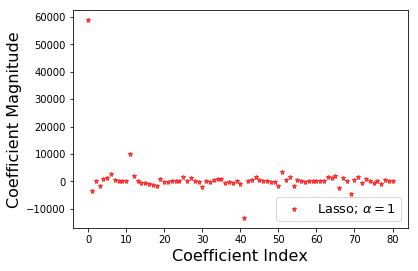

In [0]:
plt.plot(clf3.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

In [0]:
coefficient = clf3.coef_

In [0]:
coefficient.shape

(81,)

In [0]:
x_scaled.shape

(8293, 81)

In [0]:
print(coefficient)
coefficient

[ 5.87483623e+04 -3.49883641e+03  1.81486549e+02 -1.52408242e+03
  9.86677674e+02  1.42540888e+03  2.80770570e+03  6.64019983e+02
  2.11868980e+02  1.33822703e+02  2.66835405e+02  1.01638852e+04
  2.12796953e+03  1.66192498e+01 -6.54709543e+02 -6.68577398e+02
 -9.61971088e+02 -1.24861235e+03 -1.57446193e+03  7.65358582e+02
 -1.23860214e+02 -6.10062760e+01 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  1.77800179e+03  5.59154869e+00  1.26293214e+03
  0.00000000e+00 -2.76424061e+02 -2.20471653e+03  5.20165921e+00
 -4.84260429e+01  5.93746063e+02  7.60320362e+02  7.73895760e+02
 -4.08168307e+02 -3.12364078e+02 -4.19409821e+02  3.03341331e+02
 -8.40900153e+02 -1.32943031e+04  3.13745408e+02  4.99023617e+02
  1.63865432e+03  3.61754448e+02 -0.00000000e+00  1.81811827e+02
 -1.12186248e+02 -3.22449488e+02 -1.61767448e+03  3.45343678e+03
  4.94416608e+02  1.69073925e+03 -1.61108015e+03  3.83502204e+02
 -0.00000000e+00 -8.49047629e+01 -0.00000000e+00  2.35784254e+02
 -0.00000000e+00 -0.00000

In [0]:
coeff_used = np.sum(coefficient!=0)
print("number of features used: ", coeff_used)


number of features used:  69


In [0]:
coe = coefficient.reshape((-1, 1))
coe1 = coe.T
coe1.shape

(1, 81)

In [0]:
coefficient_df = pd.DataFrame(coe1, columns=x_scaled.columns)

In [0]:
coefficient_dft = coefficient_df.T

In [0]:
coefficient_dft.head

<bound method NDFrame.head of                                                            0
price                                           58748.362282
accommodates                                    -3498.836414
bathrooms                                         181.486549
bedrooms                                        -1524.082420
beds                                              986.677674
neighbourhood_cleansed_Ang Mo Kio                1425.408876
neighbourhood_cleansed_Bedok                     2807.705704
neighbourhood_cleansed_Bishan                     664.019983
neighbourhood_cleansed_Boon Lay                   211.868980
neighbourhood_cleansed_Bukit Batok                133.822703
neighbourhood_cleansed_Bukit Merah                266.835405
neighbourhood_cleansed_Bukit Panjang            10163.885221
neighbourhood_cleansed_Bukit Timah               2127.969533
neighbourhood_cleansed_Central Water Catchment     16.619250
neighbourhood_cleansed_Choa Chu Kang             -654.7

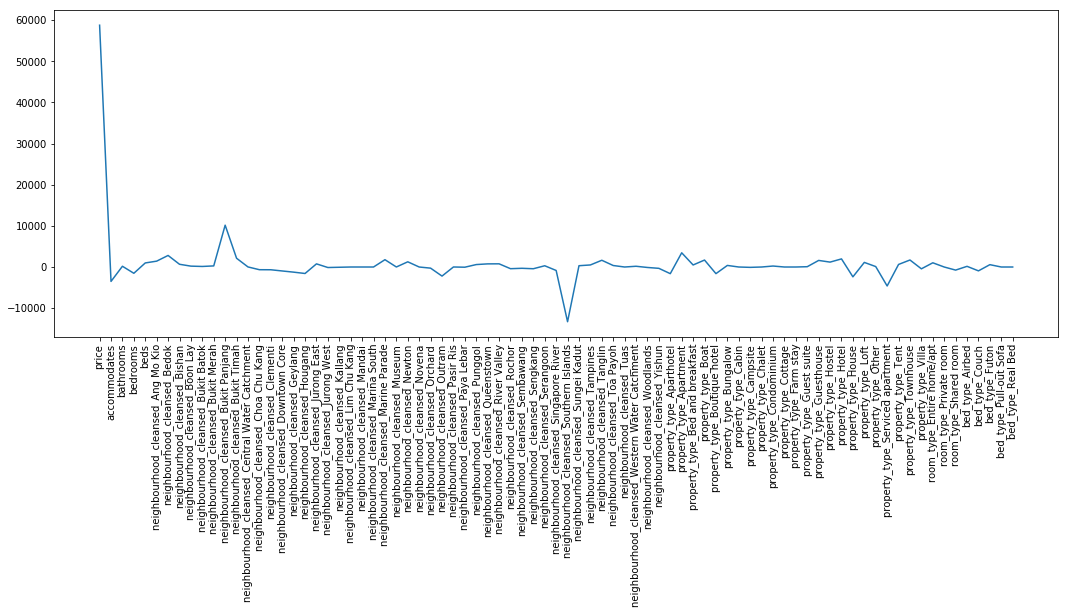

In [0]:
# Plot the coefficients
plt.figure(figsize=(18, 6))
plt.plot(coefficient_dft)
plt.xticks(range(len(coefficient_df.columns)), coefficient_df.columns.values, rotation=90) 
plt.show()

'''
# Alternate Plot the coefficients without transpose the coefficient_df
plt.figure(figsize=(18, 6))
plt.plot(range(len(coefficient_df.columns)), coefficient)
plt.xticks(range(len(coefficient_df.columns)), coefficient_df.columns.values, rotation=90) 
plt.show()
'''

In [0]:
coefficient_dft.columns

RangeIndex(start=0, stop=1, step=1)

In [0]:
coefficient_dft.columns = ['coefficient']

In [0]:
coefficient_dft.head()

,coefficient
price,58748.362282
accommodates,-3498.836414
bathrooms,181.486549
bedrooms,-1524.082420
beds,986.677674


In [0]:
coefficient_dftd = coefficient_dft[coefficient_dft['coefficient']!=0]
coefficient_dftd.shape

(69, 1)

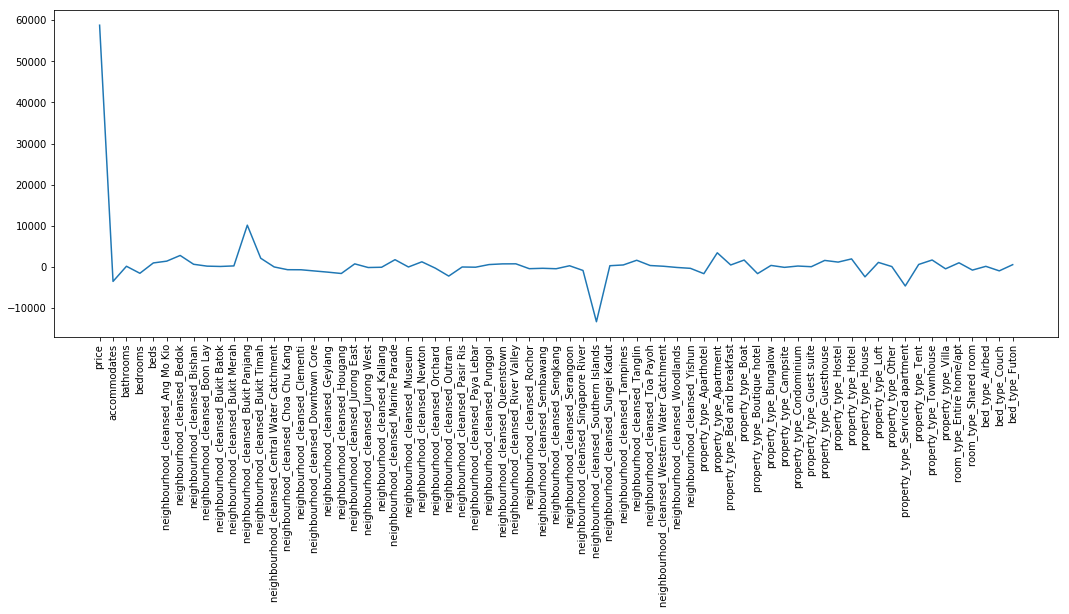

In [0]:
# Plot the non zero coefficients
plt.figure(figsize=(18, 6))
plt.plot(coefficient_dftd)
plt.xticks(range(len(coefficient_dftd.T.columns)), coefficient_dftd.T.columns.values, rotation=90) 
plt.show()

## Evaluation
Five important property characteristics give higher revenues:<p>
Price <p>
neighbourhood_cleansed_Bukit Panjang <p>
neighbourhood_cleansed_Southern Islands <p>
property_type_Serviced apartment <p>
property_type_Apartment


# References
https://www.kaggle.com/airbnb/seattle/data <p>
https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b <p>
https://www.kaggle.com/jmataya/regularization-with-lasso-and-ridge